# CHALLENGE 2
## Studi Kasus: Bank Customer Churn
(Menggunakan metode Klasifikasi ANN)

#### Dengan Kelompok beranggotakan:
- 01613821009  | Yeni Rosandi
- 016138210129 | Luthfi Dali Ahmad 
- 016138210019 | Kencana Dwi Putri
- 016138210131 | Ramadhani Dwi Nugraha

# Introduction

Churn mengacu pada rasio jumlah pelanggan yang hilang dalam periode tertentu terhadap jumlah total pelanggan. Misalnya, jika Anda memiliki 1000 pelanggan dan 10 pelanggan Anda membatalkan langganan mereka bulan itu, kecepatan churn Anda sesuai dengan 10/1000, atau 1%.

Meskipun Anda awalnya mendapatkan 100 pelanggan setiap bulan, jika tingkat churn 10%, jumlah pelanggan Anda terus meningkat. Tetapi jika rasio ini masih 10% pada titik di mana Anda mencapai 1000 pelanggan, maka Anda kehilangan 100 pelanggan setiap bulannya. 100 pelanggan baru setiap bulan menjadi tidak cukup untuk pertumbuhan Anda.

Prediksi pelanggan churn mengenai apakah mereka akan menarik akun mereka untuk membuat akun di bank yang lain merupakan hal yang penting dalam menganalisis perilaku pelanggan. Hal ini karena akan lebih mahal untuk mendapatkan pelanggan baru dibandingkan dengan pelanggan yang sudah dimiliki

Data dipandang sebagai aset yang tak ternilai bagi bank yang ingin berhasil menavigasi lingkungan yang tidak stabil saat ini. Analytics dapat membantu bank membedakan dirinya dan mendapatkan kembali keunggulan kompetitifnya melalui pemahaman yang lebih baik tentang pelanggannya.

Oleh karena itu dibutuhkan beberapa langkah:
- Mengidentifikasi dan memvisualisasi faktor apa saja yang mempengaruhi perilaku pelanggan
- Membuat permodelan untuk memprediksi perilaku pelanggan

# Metodologi

Adapun langkah yang diambil dalam menganalisis Bank Costumer Churn:
- Bussiness understanding
- Analytic approach
- Data requirements
- Data collection
- Data understanding
- Data preparation
- Modelling
- Evaluation
- Feedback

[image.png](attachment:image.png)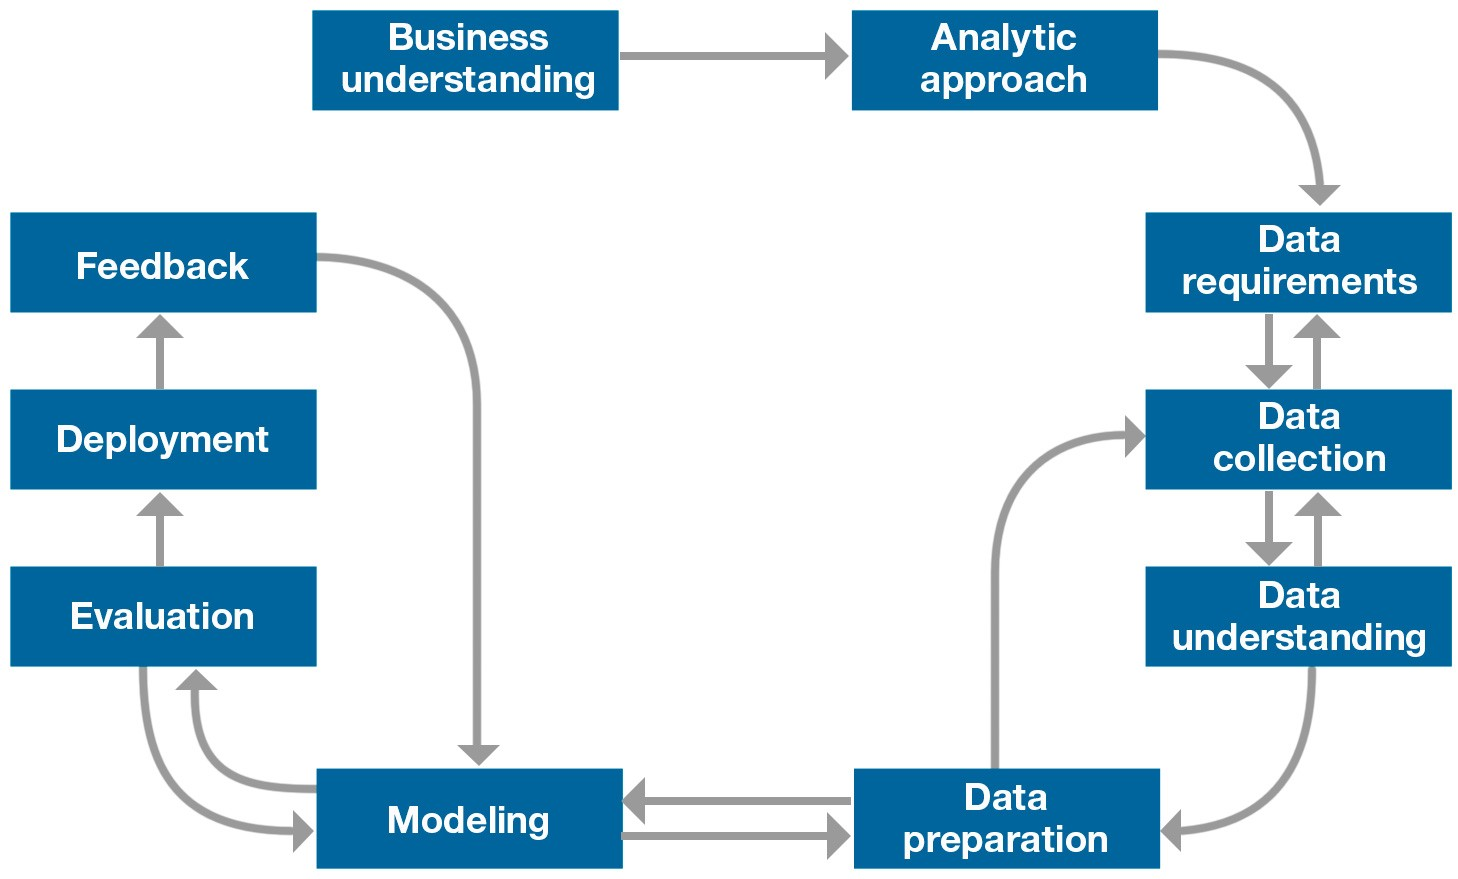

# Business Problem

Banyaknya pelanggan bank yang menghentikan layanan berdampak pada profit dari perusahaan. Perusahaan dapat melakukan analisis data menggunakan rekaman data yang dimiliki. Sehingga perusahaan dapat memahami kemungkinan pelanggan akan menghentikan layanan dan dapat meningkatkan retensi bahkan mungkin merencanakan penambahan pelanggan.

Kami akan menganalisa dataset yang berisi beberapa pelanggan yang menarik akun mereka dari bank karena beberapa kerugian dan masalah lain, dengan bantuan data ini kami akan analisis dengan memprediksi perilaku pelangganya dan memprediksi apakah costumer tersebut akan menghentikan layanan perusahaan (churn).

# Analytic Approach
Kami akan menggunakan pendekatan sistematis langkah demi langkah menggunakan metode yang dapat digunakan untuk berbagai masalah Machine Learning. Pada Kasus ini kami akan menggunakan algoritma ANN (Artificial Neural Network) untuk memprediksi costumer churn. Kami akan menggunakan TensorFlow deep learning frame work dalam pembuatan model prediksi. ANN adalah sebuah alat pemodelan data statistik dan non statistik. ANN dapat melakukan pemodelan hubungan yang rumit (kompleks) antara input dan output dengan tujuan untuk menemukan pola pada data (Habibi & Riksakomara, 2013).<br><br>
Customer churn merupakan pengukuran jumlah dari individu atau item yang keluar dari sekelompok kolektif dalam periode tertentu.

# Data Requirement
Melalui pendekatan prediktif, data yang dibutuhkan untuk menyelesaikan masalah bisnis diatas adalah data konsumen perusahaan tersebut, yang dimana sumber datanya langsung melalui database perusahaan tersebut dengan format berupa csv, dan data bertipe string/objek untuk data tertentu seperti nama kostumer, jenis kelamin, dan asal negara serta tipe data numerik untuk data-data yang dibutuhkan.
### Import Libraries
Ditahap ini kami akan menggunakan library Tensorflow dan Keras, dan library lainnya yang dibutuhkan untuk analisis dan visualisasi data. Seperti pada kode program dibawah ini:

In [1]:
import pandas as pd  #Data Analisis
import numpy as np   #komputasi Ilmiah

#Machine Learning Library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Komputasi numerik yg cepat
import tensorflow as tf
from tensorflow import keras

#Memanggil: 
#confusion_matrix untuk mengevaluasi kinerja suatu model
#classification report untuk mengukur kualitas prediksi dari algoritma klasifikasi
#(precision, recall, f1-score)
from sklearn.metrics import confusion_matrix, classification_report

#Visualisasi data
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#Untuk search/manipulasi string
import re

C:\Users\LENOVO\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Data Collection
Data didapatkan dari situs web Kaggle dengan judul "Bank Customer Churn" oleh Santosh Kumar, dalam bentuk csv. Usability pada data ini bernilai 9.7. Dataset ini berupa data detail dari beberapa kostumer di suatu perusahaan. Pertama-tama kita akan load datanya terlebih dahulu (Disini saya menggunakan Python Notebook pada IBM Cloud).

In [2]:
df_customer_churn = pd.read_csv("Churn_Modelling.csv")
df_customer_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Cek berapa banyak baris data dan fiturnya
print(f'Banyaknya baris data= {df_customer_churn.shape[0]}\nBanyaknya fitur= {df_customer_churn.shape[1]}')
#f adalah format string!

Banyaknya baris data= 10000
Banyaknya fitur= 14


# Data Understanding
Mari mengenal lebih dekat dengan data yang akan diolah. Didapatkan Analisa sebagai berikut:
- Dataset terdiri dari 10000 kostumer dan 14 fitur
- Tiap baris merepresentasikan kostumer, adan tiap kolom adalah fitur dari kostumer
- Kolom "Exited" berisi 1 dan 0, dimana 1 berarti Ya, dan 0 berarti kostumer tidak keluar/berhenti menggunakan layanan
- Fitur yang ada pada dataset dapat dilihat dibawah ini,

| Fitur|Keterangan|
| :--- | :--- |
| RowNumber|Nomor Baris|
|CustomerId|Nomor identitas kostumer|
|Surname|Nama belakang|
|CreditScore|Nilai kredit yang menunjukkan kepada pemberi pinjaman kapasitas mereka untuk membayar kembali pinjaman|
|Geography|Negara atau wilayah|
|Gender|Laki-laki atau perempuan|
|Age|Umur dari kostumer|
|Tenure|Jumlah berapa bulan pelanggan sudah terikat di perusahaan|
|Balance|jumlah uang kostumer yang tersisa|
|NumOfProducts|Banyaknya produk yang mereka miliki|
|HasCrCard|Kostumer memiliki kartu kredit atau tidak|
|IsActiveMember|Seberapa aktif kostumer|
|EstimatedSalary|Estimasi gaji|
|Exited|Apakah kostumer tetap tinggal atau pergi|

### Basic Insight (1)
- Memahami dan mengecek tipe data pada dataset, untuk mengecek apakah tipe data tersebut cocok menggunakan metode yang kami harapkan (ANN), dan menghindari terjadinya tipe data yg missmatch

In [4]:
df_customer_churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Tipe data diatas sudah sesuai. Terdapat 3 tipe data objek pada "Surname, Geography, dan Gender", dan sisanya adalah data berupa angka. 

### Basic insight (2) 
Melihat beberapa detail statistik dasar seperti persentil, max, min, mean, std, dll. dari data frame customer_churn ini

In [5]:
df_customer_churn.describe() 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Exploratory Visualisations
Pada bagian ini, kami akan menunjukan visualisasi data yang merangkum/mengekstrak karakteristik fitur-fitur yang relevan dalam kumpulan data ini, seperti pada fitur "Tenure" fitur ini sangat krusial untuk mencari kostumer yang loyal dan tidak dan fitur "Exited" sebagai kesimpulan/dependen variabel dari tiap kostumer.

Melihat relasi dari exited dan data yang lain

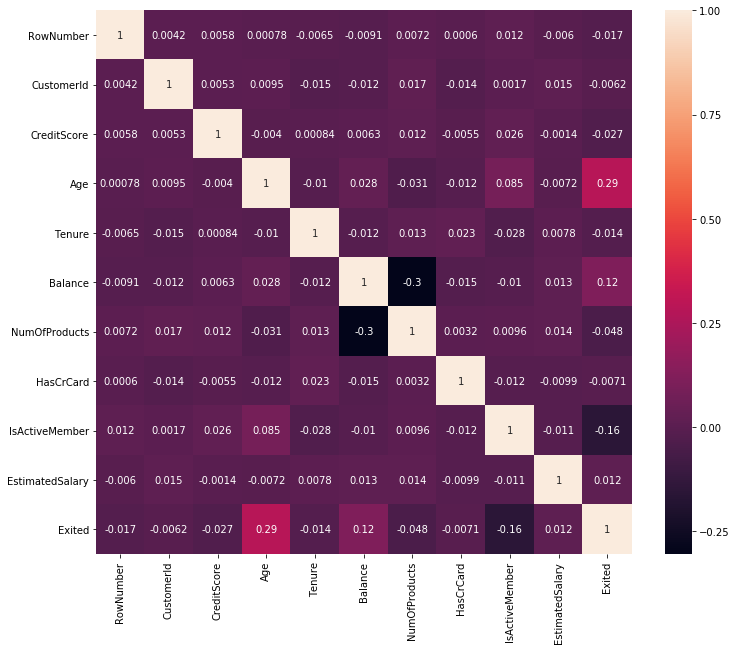

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df_customer_churn.corr(),annot = True)

Dapat terlihat bahwa tidak ada korelasi yang signifikan antara salah satu fitur, dan korelasi tertinggi tampaknya antara Usia, dan variabel target Exited yang menyimpulkan bahwa ada kelompok usia tertentu yang lebih cenderung membatalkan langganan daripada yang lain, namun ini juga tidak berkorelasi tinggi.

Terdapat korelasi negatif antara CreditScore dan Exited, artinya dengan meningkatnya nilai kredit maka peluang pembatalan langganan semakin berkurang dan sebaliknya.

Demikian pula, ada korelasi negatif antara tenure dan pembatalan yang berarti bahwa tenure yang lebih besar, kecil kemungkinannya untuk membatalkan langganan yang menunjukkan loyalitas terhadap layanan, dan dapat digunakan secara efektif untuk mengidentifikasi basis pelanggan setia yang dapat ditingkatkan.

Korelasi antara Number of Products dan pembatalan langganan juga negatif, artinya dengan jumlah layanan yang lebih tinggi, jelas pelanggan cenderung tidak berhenti berlangganan.

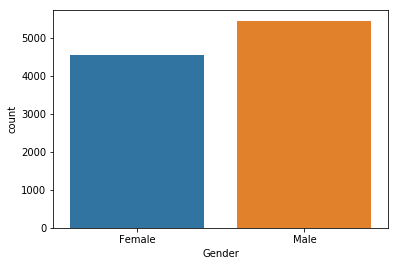

In [7]:
sns.countplot(data=df_customer_churn, x='Gender')

Dari barplot terlihat pelanggan laki-laki jumlahnya lebih banyak dari perempuan

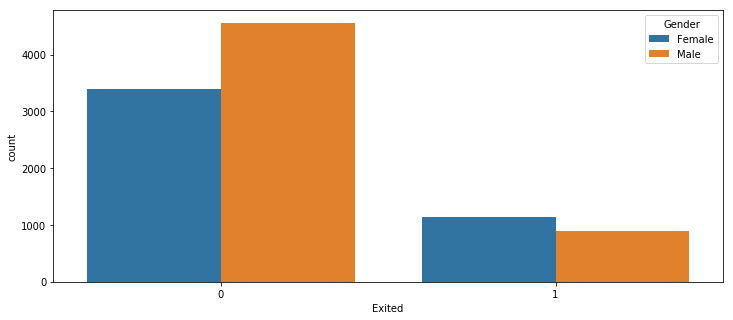

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x= df_customer_churn['Exited'], hue=df_customer_churn['Gender'])
plt.show()

Data diatas bertujuan untuk membandingkan berapa banyak pria dan wanita yang memilih berhenti dan bertahan pada perusahaan ini. Seperti grafik yang ditampilkan diatas, dapat dilihat bahwa:
- Jumlah yang bertahan (0= Tidak Exited), jumlah **perempuan** lebih banyak dari laki-laki.
- Jumlah yang berhenti (1= Ya Exited), jumlah **laki-laki** lebih banyak yg keluar daripada perempuan

In [9]:
genders = df_customer_churn.groupby(['Gender']).count()
genders

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,,,,,
Female,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543
Male,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457


Perbedaan jumlah laki laki dan perempuan sebanyak hampir 1000 pelanggan

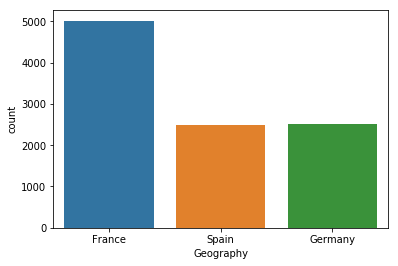

In [10]:
sns.countplot(data=df_customer_churn, x='Geography')

Pada barplot geography, jumlah pelanggan terbanyak berasal dari France, untuk melihat angka pastinya dapat dicek di bawah :

In [11]:
country = df_customer_churn.groupby(['Geography']).count()
country.RowNumber

Geography
France     5014
Germany    2509
Spain      2477
Name: RowNumber, dtype: int64

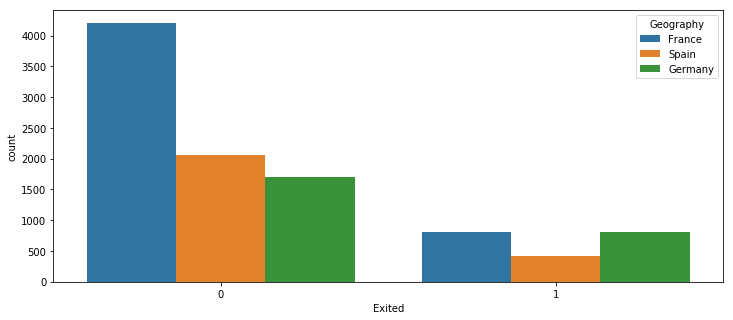

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(x= df_customer_churn['Exited'], hue=df_customer_churn['Geography'])
plt.show()

Data diatas bertujuan untuk membandingkan costumer berasal dari negara manakah yang paling banyak bertahan atau tidak. Seperti grafik yang ditunjukan diatas, dapat dilihat bahwa:
- Kostumer paling banyak dari negara Prancis
- Kostumer dari negara prancis memiliki selisih yang jauh lebih banyak yang bertahan di perusahaan dari pada yang keluar
- Kostumer paling banyak memilih berhenti berlangganan ada di negara Jerman dan kemudian Prancis

In [13]:
Exited = df_customer_churn.query('Exited == 1')
Product = Exited['NumOfProducts'].value_counts()
Product = pd.DataFrame(Product).reset_index() 
Product.columns = ['NumOfProducts','Total']

import plotly.express as px
fig = px.bar(Product, x = 'NumOfProducts', y = 'Total' ,
             hover_data = ['NumOfProducts','Total'] , color='NumOfProducts', height=400, title = 'Exited members and Num of Products')
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [14]:
CreditCard = Exited['HasCrCard'].value_counts()
CreditCard = pd.DataFrame(CreditCard).reset_index() # Creating DF
CreditCard.columns = ['CreditCard','Total']

fig = px.bar(CreditCard, x = 'CreditCard', y = 'Total' ,
             hover_data = ['CreditCard','Total'] , color='CreditCard', height=400, title = 'Exited members and credit card')
fig.show()

NameError: name 'px' is not defined

Sebagian besar anggota/pelanggan yang keluar hanya memiliki 1 produk di bank dan memiliki kartu kredit tidak mempengaruhi mereka dalam pengambilan keputusan.

### Perbandingan Pelanggan Churn dan Tidak 

Text(0.5,1,'20.37 % (2037) of cust will churn & 79.63 % (7963) of cust will retain')

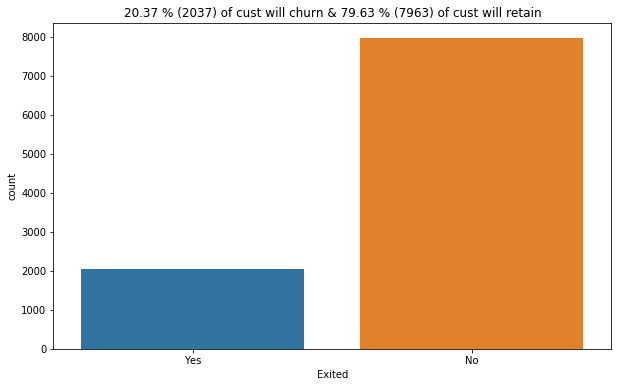

In [15]:
#Mengubah kolom Exited menjadi Yes or No
df_customer_churn['Exited'] = df_customer_churn.Exited.astype(bool)
df_customer_churn['Exited'] = df_customer_churn['Exited'].replace({True: 'Yes', False: 'No'})
df_customer_churn.head()

# Count of customer that  churn
cust_churn_yes_count = df_customer_churn[df_customer_churn.Exited == 'Yes'].shape[0]
# Count of customer that not churn (retain)
cust_churn_no_count = df_customer_churn[df_customer_churn.Exited == 'No'].shape[0]

# Percentage of customer that will churn
cust_churn_yes_percent = round((cust_churn_yes_count / (cust_churn_yes_count + cust_churn_no_count) * 100),2)
# Percentage of customer that will not churn (retain)
cust_churn_no_percent = round((cust_churn_no_count / (cust_churn_yes_count + cust_churn_no_count) * 100 ),2)

plt.figure(figsize=(10,6))
ax = sns.countplot(df_customer_churn['Exited'])
ax.set_title(f'{cust_churn_yes_percent} % ({cust_churn_yes_count}) of cust will churn & {cust_churn_no_percent} % ({cust_churn_no_count}) of cust will retain')

Pada grafik diatas dapat dilihat bahwa:
- 79.63 kostumer tetap bertahan diperusahaan
- 20.37% pelanggan akan pergi
<br> Sehingga dapat dilihat bahwa 79.63% orang yang akan stay dapat dijadikan acuan kami untuk mendapatkan model yang memiliki akurasi lebih dari 79%. 

### Tenure Terhadap Customer Churn 

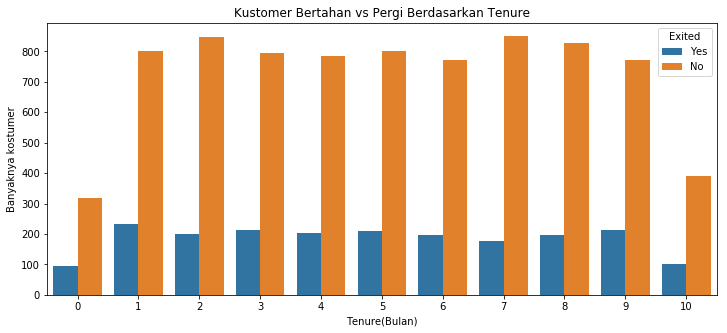

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(x= df_customer_churn['Tenure'], hue=df_customer_churn['Exited'])
plt.title('Kustomer Bertahan vs Pergi Berdasarkan Tenure')
plt.xlabel('Tenure(Bulan)')
plt.ylabel('Banyaknya kostumer')
plt.show()

Plot diatas untuk menganalisa berapa banyaknya kostumer yang bertahan dan tidak berdasarkan tenure (jumlah berapa bulan pelanggan sudah terikat di perusahaan). Pada plot diatas dapat dilihat 

### Creditscore Terhadap Customer Churn

Text(0.5,1,'Distribusi Data Creditscore')

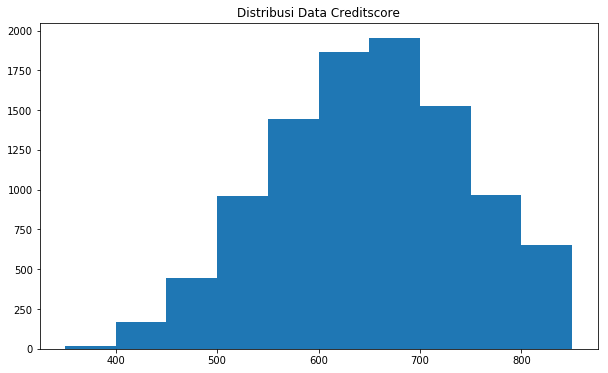

In [17]:
# Distribusi Nilai Credit Score
plt.figure(figsize=(10,6))
plt.hist(x=df_customer_churn['CreditScore'], bins = 10)
plt.title('Distribusi Data Creditscore')

Pada grafik diatas terlihat distribusi Data Creditscore dari Pelanggan. CreditScore memiliki rentang nilai dari 350 hingga 850. Frekuensi terbanyak data berada pada interval data dari 650-700. Dengan median dan rata-rata adalah 652 dan 650.52

# Data Preparation
Ini adalah tahap sebelum data diproses. Pada tahap ini kami akan dilakukan serangkaian tindakan:
### Data Cleaning
Mempersiapkan data dengan mengeksplor datanya, memastikan tiap data sudah dalam format yang benar, tidak ada nilai null/kosong, duplikat, hingga menormalisasikan data.
#### a) Data Null 

In [18]:
df_customer_churn.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

Terlihat tidak ada nilai yang kosong, karena tidak ada "True" pada output diatas. 
#### b) Unmatch Data
Selanjutnya kami cek data yang memiliki **nilai yg tidak sesuai, misalnya:**. 
- Pada Fitur Gender ada penulisan yang salah contohnya Harusnya Male, malah Mele.

In [19]:
#Dicek apakah match penulisan datanya Female dan Male?
gender_check= df_customer_churn.Gender.str.match(pat='(Female)|(Male)')
#Dicek seluruh data, jika semua data True maka outputnya true.
gender_check.all()

True

In [20]:
#Dicek apakah match penulisan datanya Spain, Germany, France?
gender_check= df_customer_churn.Geography.str.match(pat='(Spain)|(Germany)|(France)')
#Dicek seluruh data, jika semua data True maka outputnya true.
gender_check.all()

True

Kedua data boolean sudah di cek tidak ada penulisan yang salah pada datanya dikarenakan kedua output "True", sedangkan fitur Surname tidak perlu dicari yang match karena setiap orang memiliki nama yang berbed-beda. 
#### c) Duplicate Data
Selanjutnya mencari **data yang sama persis/duplikat** sebagai berikut:

In [21]:
df_customer_churn.duplicated().all()

False

Tidak ada data yang duplikat dikarenakan mengembalikan nilai False. 
#### d) Feature Engineering
Pada bagian ini, feature/fitur yang tidak berguna atau bersifat fatal akan dihapus, pada kasus inifitur yang dihapus berupa:
- Fitur Rownumber 
- CustomerId, dan
- Surname

Dikarenakan rowNumber tidak dibutuhkan pada pengolahan data, dan customerId adalah primary key yang tidak diperlukan, cukup berbahaya jika tersebar, dan Surname adalah data yang ridak diperlukan unuk menganalisis model maka cara menghilangkan fiturnya adalah sebagai berikut:

In [22]:
#Jika memungkinkan terjadi peubahan data dengan signifikan
df1_customer_churn= df_customer_churn.drop(['Surname','RowNumber', 'CustomerId'],  axis=1)
list(df1_customer_churn.columns)

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

List diatas menunjukan nama kolom dari dataframe baru. Data diatas menunjukan bahwa fitur yang di drop benar-benar tidak muncul lagi pada dataframe ke 2 yaitu fitur RowNumbers, dan CustomerId. 

#### e) Transforming Data

Pada bagian ini kami akan working on beberapa fitur yang memiliki tipe data objek, dimana fitur ini akan dipecah dan diberikan nilai sesuai dengan nilai yang terkandung.<br><br>
**Misalnya** seperti yang dapat kita lihat kode program dibawah ini dengan output Fitur "Geography", fitur ini memiliki 3 nilai diantaranya France, Spain, dan Germany. Sehingga memecah fitur tersebut menjadi 3 fitur dengan nilai 1=True, dan 0=False. Nama fiturnya menjadi:
1. Geography_France
2. Geography_Spain
3. Geography_Germany

In [31]:
#Mengubah data Exited ke numerik
df1_customer_churn['Exited'].replace({'Yes': 1,'No': 0},inplace=True)
print(df1_customer_churn.dtypes)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [27]:
#Melihat kolom yang memiliki dtype="Object"
def kategori_objek(df1_customer_churn):
    print('Nilai yang unik dari kolom kategori adalah')
    for kolom in df1_customer_churn.columns:
        if(df_customer_churn[kolom].dtypes == 'object'): 
            print(f'Fitur/Kolom: {kolom}, Unique vlaues: {df1_customer_churn[kolom].unique()}')
kategori_objek(df1_customer_churn)

Nilai yang unik dari kolom kategori adalah
Fitur/Kolom: Geography, Unique vlaues: ['France' 'Spain' 'Germany']
Fitur/Kolom: Gender, Unique vlaues: ['Female' 'Male']
Fitur/Kolom: Exited, Unique vlaues: [1 0]


Berikut adalah cara implementasinya dengan dimasukan nilainya secar otomatis menggunakan fungsi "get_dummies".

In [ ]:
#Membuat dataframe baru dimasukan ke df baru berdasarkan dataset sebelumnya
df2_customer_churn= pd.get_dummies(data=df1_customer_churn)
#Cek lagi banyak fitur dan kolomnya
print("Data frame Sebelumnnya")
print(f'Banyaknya baris data= {df1_customer_churn.shape[0]},Banyaknya fitur= {df1_customer_churn.shape[1]}')
print("Data frame Baru")
print(f'Banyaknya baris data= {df2_customer_churn.shape[0]},Banyaknya fitur= {df2_customer_churn.shape[1]}')

Dapat dilihat terdapat peningkatan fitur sebanyak 3 fitur dari data sebelumnya. Data framenya dapat dilihat dibawah ini:

In [ ]:
df2_customer_churn.sample(5)

#### f) Normalization 
Selanjutnya data dinormalisasi, ditahap ini kita akan mengidentifikasi fitur yang perlu di normalisasi menggunakan library sklern MinMaxScaler. Normalisasi dilakukan untuk menstandarkan berbagai fitur masukan sehingga model pembelajaran mesin dapat belajar dari data dengan cepat. 

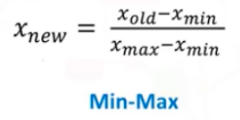
    <center><sub><sup>Gambar Min-Max Normalisasi | Source: Materi Pertemuan ke 11, page 47-Digitalent</sup></sub><center>


In [ ]:
list(df2_customer_churn.columns)

In [ ]:
df2_customer_churn.describe()

In [ ]:
#Kolom yang ingin dinormalisasi
kolom_normalisasi = ['Age','Tenure','Balance','NumOfProducts','HasCrCard', 'IsActiveMember','EstimatedSalary']

#Kodingan normalisasi pake MinMaxScaler
scaler = MinMaxScaler()

df2_customer_churn[kolom_normalisasi] = scaler.fit_transform(df2_customer_churn[kolom_normalisasi])
df2_customer_churn[kolom_normalisasi].describe()

Tabel sudah dinormalisasiSehingga Tahap **Pre-Processing** dapat dikatakan **selesai**. Selanjutnya data yang sudah di cleaning dapat **di bagi menjadi data training dan data testing**.

# Split Data Train & Test
Pada tahap ini dataset/dataframe dibagi menjadi 2 dataset, biasanya 80% data train dan 20% data testing. Disini kita menggunakan library sklearn (model_selection.train_test_split) untuk membagi datasetnya menjadi 2 dataset. <br>
Catatan:
- axis y untuk variabel dependen yaitu Exited
- axis x untuk independen variabel

In [ ]:
#Khusus untuk fitur Exited
Y= df2_customer_churn['Exited']
#Exited di drop karena tidak dimasukan
X= df2_customer_churn.drop('Exited', axis='columns')

Catatan:
- train_test_split(input features, labels, test_size)
- tst_size=0.2, artinya 80% data training dan 20% data testing
- random_state itu argumen opsional

In [ ]:
#Membagi dataset 80% train & 20% test
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=1)
valitrain, x_test, valitest, y_test = train_test_split(x_test,y_test,test_size = 0.5)

#Melihat berapa banyak data
print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

In [ ]:
#Lihat data training
x_train.head()

In [ ]:
#Lihat data testing
x_test.head()

# Modeling with ANN
Artificial Neural Network atau jaringan syaraf tiruan adalah suatu model machine learning yang meniru cara kerja jaringan neural biologis. Untuk membangun ANN itu sendiri membutuhkan konfigurasi untuk ke-3 layer, yaitu:
- Input Layer
- Hidden Layer 
- Output Layer
<br>

### Build Model
#### Input Layer
Untuk layer pertama input neuron yang akan dimasukan sebesar nilai maksimum neuron yang dimiliki, dalam kasus ini neuron yang dimasukan sebesar 13. 
#### Hidden Layer
Untuk layer kedua, banyaknya neuron yang harus dimasukan adalah nilai rata-rata dari input layer (13 neuron), dan banyaknya nodes di output layer (1 neuron). Sehingga 13+1/2= 7 neuron.
#### Output Layer
Layer output, neuron yang ditambahkan hanya satu menggunakan sigmoid activation function, dikarenakan output yang dikeluarkan bernilai True(1), dan False(0) saja.
<br>Sehingga implementasi kode program dapat dilihat dibawah ini:

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(13, input_shape= (13,), activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    #Range sigmoid 0-1
    tf.keras.layers.Dense(1,  activation='sigmoid')   
])

#Binary_crossentropy digunakan karena outputnya berupa binary (True/False)
model.compile(optimizer= 'adam',
             loss= 'binary_crossentropy',
             metrics=['accuracy'])

### Model Training

In [ ]:
history = model.fit(x_train, y_train , validation_data = (valitrain,valitest),epochs = 50)


### Model Evaluation
DI bagian evaluasi model kami digunakan data testing, untuk mengevaluasi dan memprediksi data testing.

In [ ]:
model.evaluate(x_test, y_test)

Akurasi data testing juga didapatkan akurasi sebesar 0.8255001 atau 83%

#### Predictions
Melihat kapabilitas untuk prediksi customer yang berhenti berlangganan dengan data test

In [ ]:
y_predict= model.predict(x_test)
#Treshold 50%
y_predict[:20]

Seperti yang ditunjukan pada hasil prediksi diatas, didapatkan hasil dengan rentang 0-1. Untuk medapatkan output biner yang diinginkan, maka digunakan treshold 0.5 dimana jika output lebih dari 0.5 makan akan menjadi 1(Yes) selain itu 0(No).

In [ ]:
y_prediction= []

for value in y_predict:
    if value>=0.5:
        y_prediction.append(1)
    else:
        y_prediction.append(0)

y_prediction[:20]

In [ ]:
df_true_pred = pd.DataFrame({'y_test':y_test, 'y_prediction':y_prediction}) 
df_true_pred[:20]

#### Cek precision, recall and f1-score

In [ ]:
print(classification_report(y_test, y_prediction))

Dari hasil diatas dapat kita lihat bahwa:
<br>**Pada kelas 0 (Berlangganan)**
<br>Precision, recall, dan F1-score memiliki nilai lebih dari 86%
<br>**Pada kelas 1 (Berhenti berlangganan)**
<br> 
Nilai rata-rata masing-masing lebih dari 80% dengan Rata-rata, 
- Precision 81%
- Recall 83%
- F1-Score 81%

<br><br> Setelah mengevaluasi model, kemudian kami akan menampilkan confusion matrix dalam bentuk heatmap plot.

In [ ]:
len(acc)

In [ ]:
#plot akurasi dan loss data

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
con_mat= tf.math.confusion_matrix(labels=y_test, predictions=y_prediction)
plt.figure(figsize=(10, 5))

In [ ]:
hist=pd.DataFrame(history.history)

f, ax = plt.subplots(1, 1,figsize = (15,8))
sns.lineplot(x = range(0,50),y = hist.binary_crossentropy , color = "green",label='Training binary crossentropy')
sns.lineplot(x = range(0,50),y = hist.val_binary_crossentropy , color = "blue",label='Validation binary crossentropy')
sns.lineplot(x = range(0,50),y = hist.accuracy , color = "red",label='Training Accuracy')
sns.lineplot(x = range(0,50),y = hist.val_accuracy , color = "purple",label='Validation Accuracy')